1. Loading the Libraries

In [1]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

2. Loading data files, defining the columns 

In [2]:
#Define the columns to be added into the dataset
column_names = ['age','workclass','fnlwgt','education', 
                'education-num','marital-status', 'occupation', 
                'relationship','race', 'sex','capital-gain', 
                'capital-loss','hours-per-week','native-country','income-per-year']

#Create train_df and test df and copy it as data frames
train_df = pd.read_csv('adult.data', sep=",", header=None, names = column_names, engine='python').copy()
test_df = pd.read_csv('adult.test', sep=",", header=None, names = column_names, engine='python').copy()

3. Raw Data Analysis

In [3]:
#Identify the number of records and columns in the train_df
train_df.shape

(32561, 15)

In [4]:
#Identify the data types in train data
train_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income-per-year    object
dtype: object

In [5]:
#Identify the number of records and columns in the train_df
test_df.shape

(16282, 15)

In [6]:
#Identify the data types in test data
test_df.dtypes

age                 object
workclass           object
fnlwgt             float64
education           object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income-per-year     object
dtype: object

In [7]:
train_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [9]:
#Drop the first row as it contains the heading 1 x 3 Cross vadilator
test_df = test_df.drop(index=0).copy()
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


4. Data Preprocessing

In [10]:
#Replacing the "." with empty space
test_df['income-per-year'] = test_df.apply(lambda row: row['income-per-year'].replace(".",""), axis=1)
test_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [11]:
#To replace ? to Nan values
train_df = train_df.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "?" else x)
train_df.replace("?", np.nan, inplace=True)

In [12]:
#Identify the total missing rowa of records and values
missing_rows = train_df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values in train_df: {missing_rows}")
total_missing_values = train_df.isna().sum().sum()
print(f"Total number of missing values in the Train DataFrame: {total_missing_values}")

Number of rows with missing values in train_df: 2399
Total number of missing values in the Train DataFrame: 4262


In [13]:
#To drop rows with Nan values
train_df=train_df.dropna()
#Identify the total missing rowa of records and values
missing_rows = train_df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values in train_df after dropping: {missing_rows}")
total_missing_values = train_df.isna().sum().sum()
print(f"Total number of missing values in the Train DataFrame after dropping: {total_missing_values}")

Number of rows with missing values in train_df after dropping: 0
Total number of missing values in the Train DataFrame after dropping: 0


In [14]:
#Repeat for test df
#to replace ? to Nan values
test_df = test_df.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "?" else x)
test_df.replace("?", np.nan, inplace=True)

In [15]:
missing_rows = test_df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows}")
total_missing_values = test_df.isna().sum().sum()
print(f"Total number of missing values in the Test DataFrame: {total_missing_values}")

Number of rows with missing values: 1221
Total number of missing values in the Test DataFrame: 2203


In [16]:
#To drop rows with Nan values
test_df=test_df.dropna()
#Identify the total missing rowa of records and values
missing_rows = test_df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values in test_df after dropping: {missing_rows}")
total_missing_values = test_df.isna().sum().sum()
print(f"Total number of missing values in the Test DataFrame after dropping: {total_missing_values}")

Number of rows with missing values in test_df after dropping: 0
Total number of missing values in the Test DataFrame after dropping: 0


In [17]:
nrows_before = len(train_df)
train_df = train_df.drop_duplicates()
print(f"Number of duplicate rows dropped: {nrows_before - len(train_df)}")

Number of duplicate rows dropped: 23


In [18]:
#Confirm rows and columns for train_df after removing missing rows and duplicates
train_df.shape

(30139, 15)

In [19]:
#Confirm rows and columns for test_df after removing missing rows and duplicates
test_df.shape

(15060, 15)

In [20]:
#Checking of data types of test df
test_df.dtypes

age                 object
workclass           object
fnlwgt             float64
education           object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income-per-year     object
dtype: object

5. Analysis of each feature from Training Data (train_df) - Univariate Analysis and Further Preprocessing


5.1 Age

In [21]:
#Understand the distribution of the age
train_df['age'].describe()

count    30139.000000
mean        38.441720
std         13.131426
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [22]:
#Understand the distint count of the age
train_df['age'].value_counts()


age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64

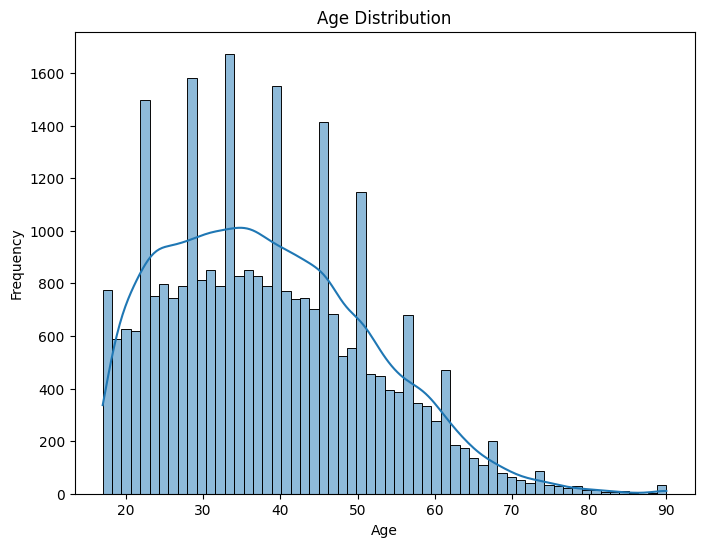

In [23]:
# Age distribution 
plt.figure(figsize=(8, 6))
sns.histplot(train_df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [24]:
#Age can be classified easier into sge range for processing
# Define bins and labels to be categorised and easier encoding later
bins = [0, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['<=20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']

#Create an Age Group Column
# Use pd.cut() to bin the 'age' column and add 'Age Group' to the DataFrame
train_df['age-range'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)

#Drop off age column since it is not in use anymore, copy new df back into combined df 
#print a a record to verify features header
train_df=train_df.drop('age', axis=1)
train_df.head(1)


,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year,age-range
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,31-40


In [25]:
# As age is an object type in test_df, need to convert to int before classifying
test_df['age'] = test_df['age'].astype(int)

In [26]:
#Display test_df tyoes for confirmation
test_df.dtypes

age                  int32
workclass           object
fnlwgt             float64
education           object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income-per-year     object
dtype: object

In [27]:
#Repeat for test_df
#Age can be classified easier into sge range for processing
# Define bins and labels to be categorised and easier encoding later
bins = [0, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['<=20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']

#Create an Age Group Column
# Use pd.cut() to bin the 'age' column and add 'Age Group' to the DataFrame
test_df['age-range'] = pd.cut(test_df['age'], bins=bins, labels=labels, right=False)

#drop off age column since it is not in use anymore, copy new df back into combined df 
#print a a record to verify features header
test_df=test_df.drop('age', axis=1)
test_df.head(1)

,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year,age-range
1,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,21-30


5.2 WorkClass

In [28]:
#Understand the distinct count of the workclass
#Since there are 7 distinct classfication, we can leave it as it is for encoding later
train_df['workclass'].value_counts()

workclass
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

5.3 Fnlwgt

In [29]:
#Understand the distinct count of the age, from the description 
#It is sessentially like a personal identifier, so I am going to drop this column
train_df['fnlwgt'].value_counts()

fnlwgt
203488    13
113364    12
123011    12
148995    12
121124    12
          ..
63685      1
145439     1
255161     1
275818     1
201490     1
Name: count, Length: 20263, dtype: int64

In [30]:
#Drop the column fnlwgt from train_df and test_df
train_df= train_df.drop(columns=['fnlwgt'])
test_df= test_df.drop(columns=['fnlwgt'])

5.4 Education and Education Num
Looking at both the statistic, the column Education is already being represented by Education-num column

In [31]:
#Drop the Education column
train_df= train_df.drop(columns=['education'])
test_df= test_df.drop(columns=['education'])

test_df.head(1)

,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year,age-range
1,Private,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,21-30


5.5 Marital Status

In [32]:
#Understand the distinct count of the material status
#We can further simplify the 7 attributes into 2 distince which is single or married for easier processing

train_df['marital-status'].value_counts()

test_df.head(1)

,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year,age-range
1,Private,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,21-30


In [33]:
#Make classification of single = 1 and married =2 for both train and test set
train_df['singleormarried'] = train_df['marital-status'].apply(
    lambda x: 'Married' if isinstance(x, str) and x.strip() in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',] else 'Single'
    )
#Drop off marital-status column since it is represented by "single=0, married=1" column
train_df=train_df.drop('marital-status', axis=1).copy()


#Make classification of single = 1 and married =2 for both train and test set
test_df['singleormarried'] = test_df['marital-status'].apply(
    lambda x: 'Married' if isinstance(x, str) and x.strip() in ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse',] else 'Single'
    )
#Drop off marital-status column since it is represented by "single=0, married=1" column
test_df=test_df.drop('marital-status', axis=1).copy()


5.6 Occupation

In [34]:
#Understand the distinct count of the occupation
#Will leave the occupation untouched since I am not able to break down into further classification
train_df['occupation'].value_counts()

occupation
Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: count, dtype: int64

5.7 Relationship

In [35]:
#Understand the distinct count of the occupation
#Will leave the occupation untouched since I am not able to break down into further classification
train_df['relationship'].value_counts()

relationship
Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-relative      889
Name: count, dtype: int64

5.8 Race

In [36]:
#Understand the distinct count of the race, and since it is 5 categories, I will leave as it is
train_df['race'].value_counts()

race
White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

5.9 Sex

In [37]:

#We simply split this into 2 classification, will be encoded later
train_df['sex'].value_counts()

sex
Male      20366
Female     9773
Name: count, dtype: int64

5.10 Capital Gain and Capital Loss

In [38]:
#Understand the distribution of the capital gain, will not categorise this value
train_df['capital-gain'].describe()

count    30139.000000
mean      1092.841202
std       7409.110596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [39]:
#Understand the distinct count of the capital gain, will not categorise this value
train_df['capital-gain'].value_counts()

capital-gain
0        27601
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: count, Length: 118, dtype: int64

In [40]:
#Understand the distribution of the capital loss
train_df['capital-loss'].describe()

count    30139.000000
mean        88.439928
std        404.445239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [41]:
#Understand the distinct count of the capital gain
train_df['capital-loss'].value_counts()

capital-loss
0       28712
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: count, Length: 90, dtype: int64

5.11 Hours-per-week

In [42]:
#Understand the distribution of the capital loss

train_df['hours-per-week'].describe()

count    30139.000000
mean        40.934703
std         11.978753
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [43]:
#Understand the distinct count of the capital gain
train_df['hours-per-week'].value_counts()

hours-per-week
40    14239
50     2716
45     1752
60     1405
35     1183
      ...  
82        1
94        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64

<Axes: title={'center': 'Hours-per-week'}, xlabel='hours-per-week', ylabel='values'>

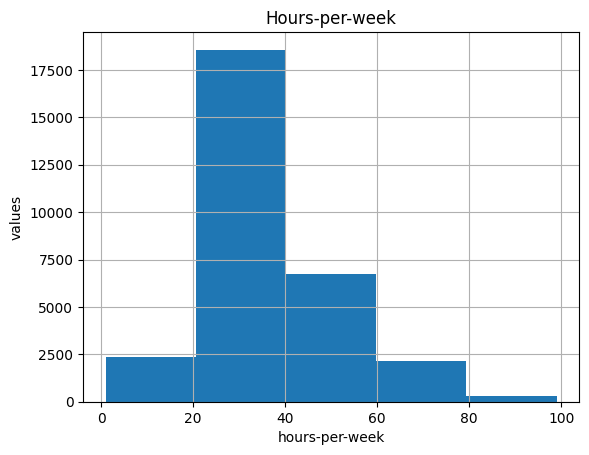

In [44]:
#Plotting out histogram chart for further understanding
#There is high distribution in the 40hours region, decided to put into 5 bins
plt.title('Hours-per-week')
plt.xlabel('hours-per-week')
plt.ylabel('values')
train_df["hours-per-week"].hist(bins=5)

In [45]:
# Define bins and labels to be categorised and easier encoding later
bins = [0, 20, 40, 60, 80, 100]
labels = ['<=20', '21< x <=40', '41< x <=60', '61< x <80', '>80']

#Create an Age Group Column
# Use pd.cut() to bin the 'age' column and add 'Age Group' to the DataFrame
train_df['working-hours-range'] = pd.cut(train_df['hours-per-week'], bins=bins, labels=labels, right=False)

#Drop off age column since it is not in use anymore, copy new df back into combined df 
#Print a a record to verify features header
train_df=train_df.drop('hours-per-week', axis=1).copy()
train_df.head(1)

,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income-per-year,age-range,singleormarried,working-hours-range
0,State-gov,13,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K,31-40,Single,41< x <=60


In [46]:
# Define bins and labels to be categorised and easier encoding later
# bins = [0, 20, 40, 60, 80, 100]
# labels = ['<=20', '21< x <=40', '41< x <=60', '61< x <80', '>80']

#Create an Age Group Column
# Use pd.cut() to bin the 'age' column and add 'Age Group' to the DataFrame
test_df['working-hours-range'] = pd.cut(test_df['hours-per-week'], bins=bins, labels=labels, right=False)

#Drop off age column since it is not in use anymore, copy new df back into combined df 
#Print a a record to verify features header
test_df=test_df.drop('hours-per-week', axis=1).copy()
test_df.head(1)



,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income-per-year,age-range,singleormarried,working-hours-range
1,Private,7.0,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,United-States,<=50K,21-30,Single,41< x <=60


5.12 Native-country

In [47]:
#Understand the distint count of the age
train_df['native-country'].value_counts()

native-country
United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

In [48]:
#Understand the distribution of the capital gain
#Decide to classify using USA and Other Countries
train_df['native-country'].describe()

count              30139
unique                41
top        United-States
freq               27487
Name: native-country, dtype: object

In [49]:
#Make classification of United-Sates = 1 and Others =2
train_df['unitedstateorothers'] = train_df['native-country'].apply(
    lambda x: 'USA' if isinstance(x, str) and x.strip() in ['United-States'] else 'Others'
    )
#Drop off native countries column since it is represented by United-States=1, Others =2" column
train_df=train_df.drop('native-country', axis=1).copy()
train_df.head(20)

,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,income-per-year,age-range,singleormarried,working-hours-range,unitedstateorothers
0,State-gov,13,Adm-clerical,Not-in-family,White,Male,2174,0,<=50K,31-40,Single,41< x <=60,USA
1,Self-emp-not-inc,13,Exec-managerial,Husband,White,Male,0,0,<=50K,51-60,Married,<=20,USA
2,Private,9,Handlers-cleaners,Not-in-family,White,Male,0,0,<=50K,31-40,Single,41< x <=60,USA
3,Private,7,Handlers-cleaners,Husband,Black,Male,0,0,<=50K,51-60,Married,41< x <=60,USA
4,Private,13,Prof-specialty,Wife,Black,Female,0,0,<=50K,21-30,Married,41< x <=60,Others
5,Private,14,Exec-managerial,Wife,White,Female,0,0,<=50K,31-40,Married,41< x <=60,USA
6,Private,5,Other-service,Not-in-family,Black,Female,0,0,<=50K,41-50,Married,<=20,Others
7,Self-emp-not-inc,9,Exec-managerial,Husband,White,Male,0,0,>50K,51-60,Married,41< x <=60,USA
8,Private,14,Prof-specialty,Not-in-family,White,Female,14084,0,>50K,31-40,Single,41< x <=60,USA
9,Private,13,Exec-managerial,Husband,White,Male,5178,0,>50K,41-50,Married,41< x <=60,USA


In [50]:
#Make classification of United-Sates = 1 and Others =2
test_df['unitedstateorothers'] = test_df['native-country'].apply(
    lambda x: 'USA' if isinstance(x, str) and x.strip() in ['United-States'] else 'Others'
    )
#Drop off native countries column since it is represented by United-States=1, Others =2" column
test_df=test_df.drop('native-country', axis=1).copy()
test_df.head(1)

,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,income-per-year,age-range,singleormarried,working-hours-range,unitedstateorothers
1,Private,7.0,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,<=50K,21-30,Single,41< x <=60,USA


5.13 Income-per-year 

In [51]:
# Target - Will  encode it later
train_df['income-per-year'].describe
train_df['income-per-year'].value_counts

<bound method IndexOpsMixin.value_counts of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income-per-year, Length: 30139, dtype: object>

5. Date Conversion and Encoding

In [52]:
train_df.head(1)

,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,income-per-year,age-range,singleormarried,working-hours-range,unitedstateorothers
0,State-gov,13,Adm-clerical,Not-in-family,White,Male,2174,0,<=50K,31-40,Single,41< x <=60,USA


In [53]:
#identify the categorical columns with values
categorical_columns = ['age-range', 'workclass', 'occupation', 'relationship', 'race', 'sex', 'singleormarried', 'working-hours-range', 
                       'unitedstateorothers', 'income-per-year']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column and replace them
# Create new column with the suffix "encoded"
# Drop the original categorical columns and replace the original df
#cal fit transform to normalise data set

for column in categorical_columns:
    train_df[column + '_encoded'] = label_encoder.fit_transform(train_df[column])
train_df.drop(columns=categorical_columns, inplace=True)


for column in categorical_columns:
    test_df[column + '_encoded'] = label_encoder.fit_transform(test_df[column])
test_df.drop(columns=categorical_columns, inplace=True)

In [54]:
train_df.head(5)

,education-num,capital-gain,capital-loss,age-range_encoded,workclass_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,singleormarried_encoded,working-hours-range_encoded,unitedstateorothers_encoded,income-per-year_encoded
0,13,2174,0,1,5,0,1,4,1,1,1,1,0
1,13,0,0,3,4,3,0,4,1,0,3,1,0
2,9,0,0,1,2,5,1,4,1,1,1,1,0
3,7,0,0,3,2,5,0,2,1,0,1,1,0
4,13,0,0,0,2,9,5,2,0,0,1,0,0


In [55]:
test_df.head(5)

,education-num,capital-gain,capital-loss,age-range_encoded,workclass_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,singleormarried_encoded,working-hours-range_encoded,unitedstateorothers_encoded,income-per-year_encoded
1,7.0,0.0,0.0,0,2,6,3,2,1,1,1,1,0
2,9.0,0.0,0.0,1,2,4,0,4,1,0,1,1,0
3,12.0,0.0,0.0,0,1,10,0,4,1,0,1,1,1
4,10.0,7688.0,0.0,2,2,6,0,2,1,0,1,1,1
6,6.0,0.0,0.0,1,2,7,1,4,1,1,0,1,0


6 Bivariate Analysis - to check attributes correlation with each other and with income

From the heat map below, it is interesting to note that education (represented by education num) and marital status (now represented by single or married) 
have a higher correlation with income. Relationship have an inverse correlation with marriage and sex.




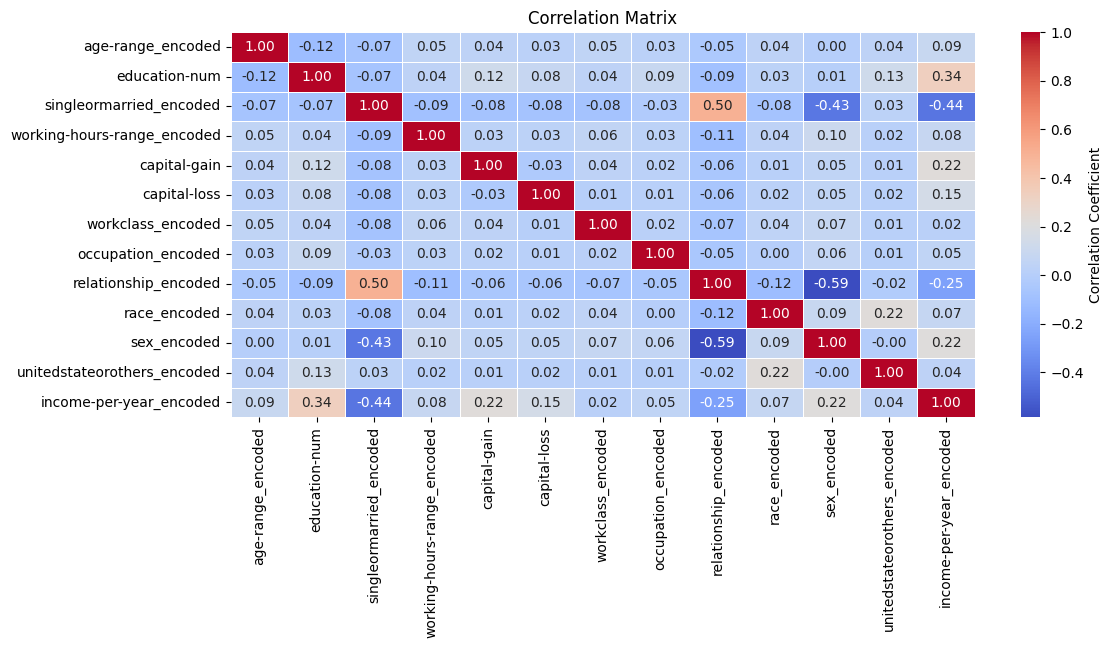

In [56]:
# Correlation and Heatmap between each variable, as 1 want to show it compare against income hence i break it into 2 charts
heat_num = train_df[['age-range_encoded','education-num','singleormarried_encoded', 
                      'working-hours-range_encoded','capital-gain','capital-loss',
                      'workclass_encoded', 'occupation_encoded', 'relationship_encoded',
                      'race_encoded', 'sex_encoded', 'unitedstateorothers_encoded','income-per-year_encoded']].corr()

plt.figure(figsize=(12, 5))  
sns.heatmap(heat_num, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

7. Prepare the preprocessed file to be sent to Classifier Algorithm

In [57]:
#Write both train_df and test_df to an output
train_df.to_csv('post-processed_train.csv')
test_df.to_csv('post-processed_test.csv')